In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read data
df = pd.read_csv(r"C:\Users\Aishwarya\Desktop\ExcelR\Day 13 Linear Regression\Data Sets\NewspaperData.csv")
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
#Select relevant columns

In [3]:
df = df[['daily','sunday']]

df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [4]:
#Data description
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [ ]:
#Data distribution

<AxesSubplot:xlabel='daily', ylabel='Density'>

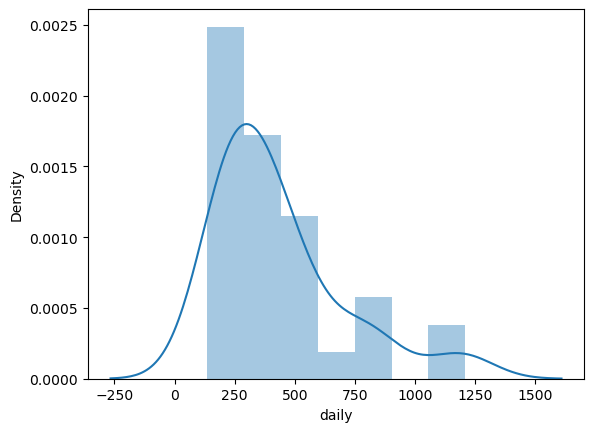

In [5]:
sns.distplot(df['daily'])

<AxesSubplot:xlabel='sunday', ylabel='Density'>

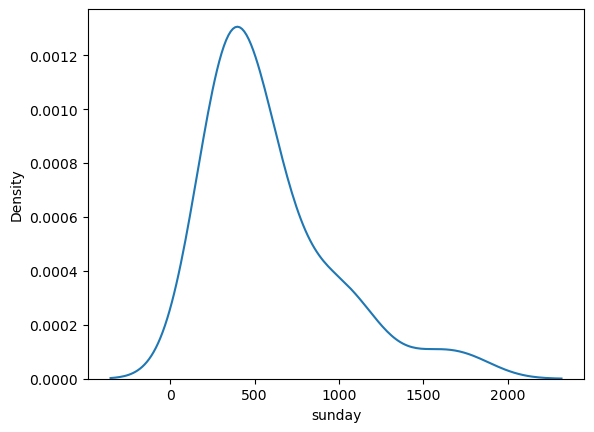

In [6]:
sns.kdeplot(df['sunday'])

In [ ]:
#Correlation analysis

<AxesSubplot:xlabel='daily', ylabel='sunday'>

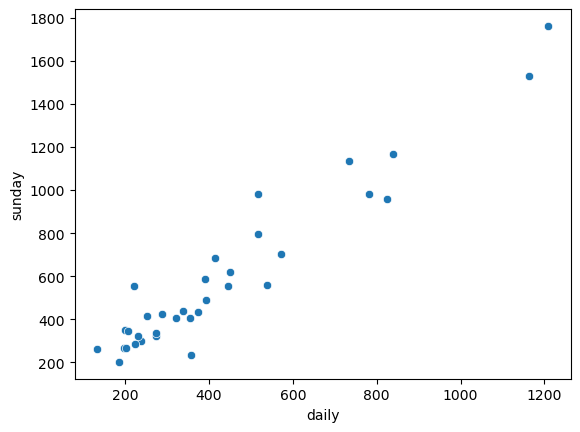

In [7]:
sns.scatterplot(df['daily'], df['sunday'])

In [8]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:>

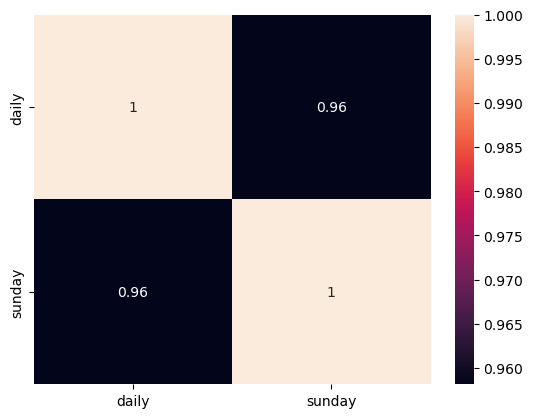

In [9]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Import statsmodels

In [10]:
import statsmodels.formula.api as smf

In [11]:
model =  smf.ols('sunday~daily', data= df).fit()

In [ ]:
#Model parameters

In [12]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [15]:
#line equation
x = 500
y = 1.33*x+13.83
y

678.83

In [19]:
#Print values for t value and p value
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}")

t value is
Intercept     0.386427
daily        18.934840
dtype: float64
P value is
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [20]:
#r2 value
model.rsquared

0.9180596895873294

# Prediction for new data

In [21]:
newadata = pd.Series([200,521,987])

newdata = pd.DataFrame(newadata, columns=['daily'])

In [22]:
newdata

,daily
0,200
1,521
2,987


In [23]:
model.predict(newdata)

0     281.778581
1     711.827019
2    1336.134096
dtype: float64

# WC dataset

In [39]:
#import data
#Create/ fit the data in model
#Get the prediction

In [25]:
df = pd.read_csv(r"C:\Users\Aishwarya\Desktop\ExcelR\Day 13 Linear Regression\Data Sets\WC_AT.csv")
df.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [26]:
model = smf.ols('AT~Waist', data=df).fit()

In [24]:
newdf = pd.Series([40,55,120])
newdf = pd.DataFrame(newdf, columns=['Waist'])

newdf

,Waist
0,40
1,55
2,120


In [27]:
model.predict(newdf)

0    -77.627112
1    -25.744221
2    199.081639
dtype: float64

In [28]:
df

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [30]:
df['Waist']

0       74.75
1       72.60
2       81.80
3       83.95
4       74.65
        ...  
104    100.10
105     93.30
106    101.80
107    107.90
108    108.50
Name: Waist, Length: 109, dtype: float64

In [31]:
df['Waist'].min()

63.5

In [32]:
df['Waist'].max()

121.0